In [1]:
#Modelos AutoML para pronosticar la inflación no subyacente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
plt.rc('font', family='Times New Roman')

In [2]:
#Creamos el dataframe

dataset = pd.read_excel('IPC_series.xlsx',sheet_name='IPCNSUB', parse_dates=['fecha'])
descripcion1=pd.DataFrame(dataset.describe())
descripcion1
train_data = dataset.iloc[0:396, 0:12]
test_data = dataset.iloc[396:411 ,0:12]


In [3]:
dataset

,fecha,item_id,ipcnsub,inp,m1,sn,sr,pml,e,cetes28,cetes91,cetesdif
0,1989-01-31,ipcnsub,4.874835,NaN,1.914647e+07,NaN,NaN,NaN,2.3100,50.7800,50.6575,42.0975
1,1989-02-28,ipcnsub,4.839201,NaN,1.929388e+07,NaN,NaN,NaN,2.3380,49.1525,49.3950,40.5550
2,1989-03-31,ipcnsub,4.846248,NaN,1.942008e+07,NaN,NaN,NaN,2.3690,47.7860,48.8080,39.6680
3,1989-04-30,ipcnsub,4.963637,NaN,1.979879e+07,NaN,NaN,NaN,2.3970,50.0875,51.5475,42.5875
4,1989-05-31,ipcnsub,5.086264,NaN,2.033392e+07,NaN,NaN,NaN,2.4300,51.8325,53.8275,45.0875
...,...,...,...,...,...,...,...,...,...,...,...,...
406,2022-11-30,ipcnsub,130.396395,-0.240753,6.602503e+09,160.4984,104.5,100.9154,19.3250,9.4150,10.1725,5.8525
407,2022-12-31,ipcnsub,129.874777,0.004631,6.926065e+09,212.2967,137.7,97.0634,19.4143,9.9560,10.5340,6.1740
408,2023-01-31,ipcnsub,130.616107,0.417539,6.670315e+09,163.7563,105.5,101.1821,18.7872,10.6125,10.8825,6.1925
409,2023-02-28,ipcnsub,131.136564,-0.034532,6.639891e+09,164.8254,105.6,97.5423,18.4023,10.9225,11.2875,6.4975


In [4]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column="item_id",
    timestamp_column="fecha"
)
train_data.head()

ipcnsub  inp          m1  sn  sr  pml      e  cetes28  \
item_id timestamp                                                            
ipcnsub 1989-01-31  4.874835  NaN  19146466.0 NaN NaN  NaN  2.310  50.7800   
        1989-02-28  4.839201  NaN  19293875.0 NaN NaN  NaN  2.338  49.1525   
        1989-03-31  4.846248  NaN  19420077.0 NaN NaN  NaN  2.369  47.7860   
        1989-04-30  4.963637  NaN  19798791.0 NaN NaN  NaN  2.397  50.0875   
        1989-05-31  5.086264  NaN  20333925.0 NaN NaN  NaN  2.430  51.8325   

                    cetes91  cetesdif  
item_id timestamp                      
ipcnsub 1989-01-31  50.6575   42.0975  
        1989-02-28  49.3950   40.5550  
        1989-03-31  48.8080   39.6680  
        1989-04-30  51.5475   42.5875  
        1989-05-31  53.8275   45.0875

In [5]:
#En caso de valores en blanco en las series
train_data = train_data.fill_missing_values()
train_data

ipcnsub       inp            m1        sn     sr  \
item_id timestamp                                                         
ipcnsub 1989-01-31    4.874835  0.652000  1.914647e+07   77.0318   96.7   
        1989-02-28    4.839201  0.652000  1.929388e+07   77.0318   96.7   
        1989-03-31    4.846248  0.652000  1.942008e+07   77.0318   96.7   
        1989-04-30    4.963637  0.652000  1.979879e+07   77.0318   96.7   
        1989-05-31    5.086264  0.652000  2.033392e+07   77.0318   96.7   
...                        ...       ...           ...       ...    ...   
        2021-08-31  115.758957  0.320738  5.854176e+09  143.9769  103.7   
        2021-09-30  117.030451  0.367977  5.880840e+09  146.4010  104.8   
        2021-10-31  119.216911  1.223382  5.936066e+09  147.9091  105.0   
        2021-11-30  123.327375  1.056783  6.105346e+09  146.1829  102.6   
        2021-12-31  122.212431  0.619087  6.377134e+09  194.1877  135.8   

                        pml        e  cetes28  cetes91  cetesdif  
item_id timestamp                                                 
ipcnsub 1989-01-31  94.5598   2.3100  50.7800  50.6575   42.0975  
        1989-02-28  94.5598   2.3380  49.1525  49.3950   40.5550  
        1989-03-31  94.5598   2.3690  47.7860  48.8080   39.6680  
        1989-04-30  94.5598   2.3970  50.0875  51.5475   42.5875  
        1989-05-31  94.5598   2.4300  51.8325  53.8275   45.0875  
...                     ...      ...      ...      ...       ...  
        2021-08-31  98.1646  20.2293   4.4550   4.8400    4.7900  
        2021-09-30  93.8768  20.3060   4.5500   4.8840    4.8440  
        2021-10-31  98.7500  20.1930   4.8400   5.2750    5.2250  
        2021-11-30  97.9952  21.8185   5.0475   5.4625    5.4125  
        2021-12-31  96.0645  20.5835   5.2880   5.6360    5.5760  

[396 rows x 10 columns]

In [6]:
train_data.tail()

ipcnsub       inp            m1        sn     sr  \
item_id timestamp                                                         
ipcnsub 2021-08-31  115.758957  0.320738  5.854176e+09  143.9769  103.7   
        2021-09-30  117.030451  0.367977  5.880840e+09  146.4010  104.8   
        2021-10-31  119.216911  1.223382  5.936066e+09  147.9091  105.0   
        2021-11-30  123.327375  1.056783  6.105346e+09  146.1829  102.6   
        2021-12-31  122.212431  0.619087  6.377134e+09  194.1877  135.8   

                        pml        e  cetes28  cetes91  cetesdif  
item_id timestamp                                                 
ipcnsub 2021-08-31  98.1646  20.2293   4.4550   4.8400    4.7900  
        2021-09-30  93.8768  20.3060   4.5500   4.8840    4.8440  
        2021-10-31  98.7500  20.1930   4.8400   5.2750    5.2250  
        2021-11-30  97.9952  21.8185   5.0475   5.4625    5.4125  
        2021-12-31  96.0645  20.5835   5.2880   5.6360    5.5760

In [6]:
#Establecemos la variable objetivo
target = 'ipcnsub'
#Ruta para guardar el modelo
save_path = 'series_ipc_nsub2_high'  # specifies folder to store trained models

In [7]:
predictor = TimeSeriesPredictor(
    prediction_length=12,
    path=save_path,
    target=target,
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    presets="high_quality",
    time_limit=1000000,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: high_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'hyperparameter_tune_kwargs': {'num_trials': 5,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'high_quality',
 'prediction_length': 12,
 'random_seed': None,
 'target': 'ipcnsub',
 'time_limit': 1000000}
Provided training data set with 396 rows, 1 items (item = single time series). Average time series length is 396.0.
Training artifacts will be saved to: C:\Users\Erik Rosas\DB tesina\series_ipc_nsub2_high
AutoGluon will save models to series_ipc_nsub2_high\
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following c

  0%|          | 0/5 [00:00<?, ?it/s]

Stopping HPO due to exhausted search space: 2 of 2 possible configs ran.
	Trained 2 models while tuning Theta.
	-49.2928      = Validation score (-MSE)
	1.39    s     = Total tuning time
Hyperparameter tuning model: ARIMA. Tuning model for up to 90909.09s of the 999999.99s remaining.
	-39.6810      = Validation score (-MSE)
	0.00    s     = Training runtime
	0.14    s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoETS. Tuning model for up to 90909.09s of the 999999.99s remaining.
	-48.8559      = Validation score (-MSE)
	0.00    s     = Training runtime
	27.31   s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoGluonTabular. Tuning model for up to 90909.09s of the 999999.99s remaining.
	-102.0942     = Validation score (-MSE)
	35.69   s     = Training runtime
	0.09    s     = Validation (prediction) runtime
Hyperparameter tuning model: DeepAR. Tuning model for up to 90909.09s of the 999999.99s remaining.
Missing logger folder: series_ipc_n

In [7]:

test_data = dataset.iloc[396:411 ,0:12]
# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_data_frame(
    test_data,
    id_column="item_id",
    timestamp_column="fecha"
)



In [8]:
test_data = test_data.fill_missing_values()

In [10]:

leaderboard=predictor.leaderboard(test_data, silent=True)

Cannot score with model AutoETS. An error occurred: 
Cannot score with model AutoARIMA. An error occurred: 


In [11]:
leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,TemporalFusionTransformer,-8.140655,-1.886995,0.553006,0.015621,1413.523765,11
1,SeasonalNaive,-8.930208,-100.274885,0.094173,4.772656,0.000000,2
2,Naive,-8.930208,-64.130988,0.094266,6.054209,0.000000,1
3,Theta\T2,-13.520270,-49.292842,0.015622,0.125393,0.000000,5
4,Theta\T1,-13.520270,-74.141167,0.015620,1.173061,0.000000,4
5,WeightedEnsemble,-19.858933,-1.480726,0.216181,0.188531,3.517654,13
6,DeepAR,-59.545267,-3.409099,1.098707,0.157278,747.653525,9
7,ARIMA,-97.131363,-39.680951,0.078784,0.140989,0.000000,6
8,ETS,-98.157335,-55.015291,0.109936,1.414218,0.000000,3
9,SimpleFeedForward,-350.854684,-4.619347,0.128930,0.015631,77.879881,12


In [10]:
leaderboard.to_csv('ipcnsub_series_leaderboard_2022.csv')

In [20]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(train_data)
predictions.head()

Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ipcnsub 2022-01-31  124.404343  122.457092  123.161247  123.530533   
        2022-02-28  125.593262  123.418831  124.170532  124.623978   
        2022-03-31  126.067261  123.631081  124.513702  125.027519   
        2022-04-30  125.704590  123.174995  124.062546  124.692818   
        2022-05-31  125.012245  122.378609  123.315796  123.956207   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
ipcnsub 2022-01-31  123.892532  124.397339  124.617050  125.076775   
        2022-02-28  125.001976  125.605705  125.806976  126.386444   
        2022-03-31  125.503937  126.087830  126.353386  127.058861   
        2022-04-30  125.142227  125.726608  126.085655  126.764107   
        2022-05-31  124.410278  125.011459  125.461441  126.059441   

                           0.8         0.9  
item_id timestamp                           
ipcnsub 2022-01-31  125.769684  126.493454  
        2022-02-28  127.184929  128.037109  
        2022-03-31  127.888077  128.807175  
        2022-04-30  127.625366  128.741302  
        2022-05-31  127.011513  128.248291

In [14]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(train_data,model='TemporalFusionTransformer')
predictions

Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ipcnsub 2022-01-31  124.051758  122.685173  123.102295  123.299660   
        2022-02-28  124.505356  122.921280  123.386086  123.682068   
        2022-03-31  124.969826  123.147766  123.717911  124.107193   
        2022-04-30  124.904716  122.924126  123.586952  124.017830   
        2022-05-31  124.383453  122.300056  122.977615  123.493729   
        2022-06-30  124.233253  121.905258  122.744690  123.296791   
        2022-07-31  124.114639  121.757080  122.664299  123.205261   
        2022-08-31  124.473259  122.171112  123.117744  123.604218   
        2022-09-30  125.385109  123.010872  124.044601  124.490944   
        2022-10-31  126.646645  124.098328  125.186874  125.656464   
        2022-11-30  128.399506  125.647018  126.721313  127.268951   
        2022-12-31  130.384995  127.345474  128.424774  129.047104   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
ipcnsub 2022-01-31  123.518700  124.051758  124.070343  124.500641   
        2022-02-28  123.922127  124.505356  124.505211  125.082596   
        2022-03-31  124.396980  124.969826  125.057457  125.763687   
        2022-04-30  124.348785  124.904716  125.124130  125.816856   
        2022-05-31  123.801468  124.383453  124.711060  125.271492   
        2022-06-30  123.641068  124.233253  124.750854  125.298622   
        2022-07-31  123.605156  124.114639  124.769043  125.307114   
        2022-08-31  124.019897  124.473259  125.133621  125.741661   
        2022-09-30  124.881676  125.385109  125.934631  126.662018   
        2022-10-31  126.035599  126.646645  127.102043  127.886162   
        2022-11-30  127.683098  128.399506  128.876663  129.662460   
        2022-12-31  129.568741  130.384995  130.885925  131.741898   

                           0.8         0.9  
item_id timestamp                           
ipcnsub 2022-01-31  125.171928  125.652412  
        2022-02-28  125.837570  126.477997  
        2022-03-31  126.598984  127.314911  
        2022-04-30  126.708801  127.610832  
        2022-05-31  126.268860  127.340477  
        2022-06-30  126.399170  127.462494  
        2022-07-31  126.424988  127.510239  
        2022-08-31  126.766609  128.010071  
        2022-09-30  127.622253  129.157349  
        2022-10-31  128.928482  130.795563  
        2022-11-30  130.974106  133.000488  
        2022-12-31  133.328674  135.257187

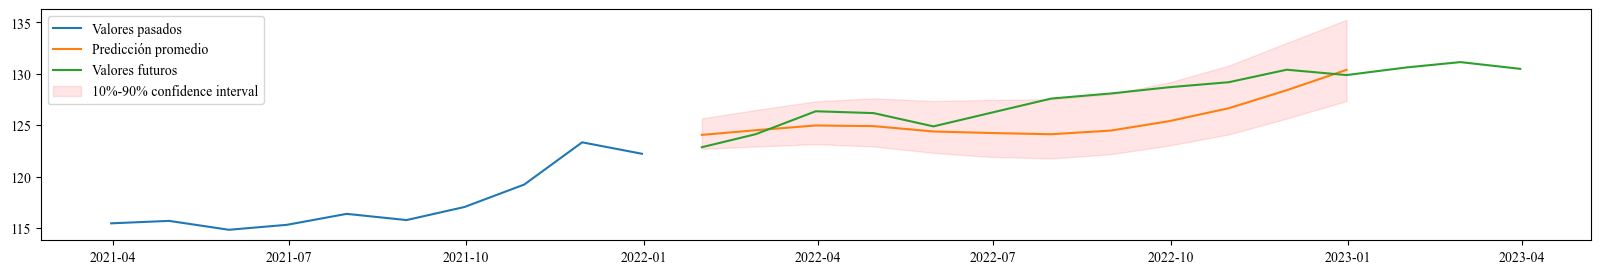

In [13]:
plt.figure(figsize=(20, 3))

item_id = "ipcnsub"
y_past = train_data.loc[item_id]["ipcnsub"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["ipcnsub"][-15:]

plt.plot(y_past[-10:], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

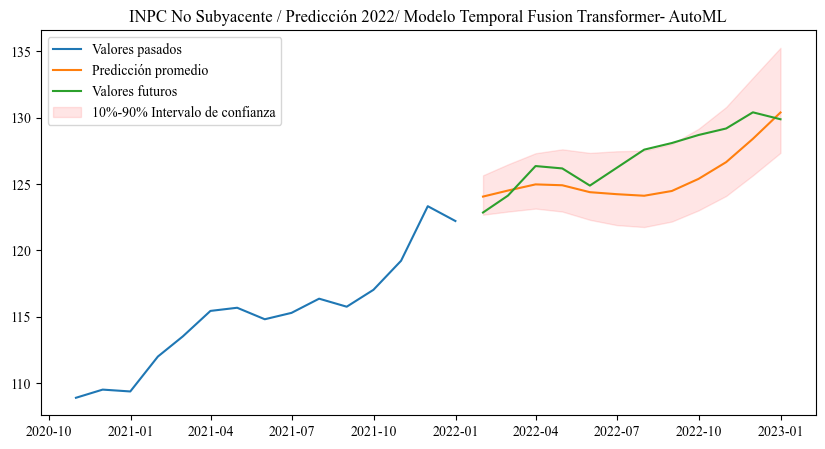

In [15]:
plt.figure(figsize=(10, 5))

item_id = "ipcnsub"
y_past = train_data.loc[item_id]["ipcnsub"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["ipcnsub"][-15:+12]

plt.plot(y_past[-15:], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC No Subyacente / Predicción 2022/ Modelo Temporal Fusion Transformer- AutoML')
plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend();


In [ ]:
import os
carpeta = 'gráficos_AutoML'
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
ruta_archivo = os.path.join(carpeta, 'ipc_pred_2022_Wensenmble.png')
plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')

In [4]:
#Ahora pronostiquemos la crisis de 2008
test_data_n = dataset.iloc[216:240 ,0:12]

# TimeSeriesDataFrame can also be loaded directly from a file
test_data_n = TimeSeriesDataFrame.from_data_frame(
    test_data_n,
    id_column="item_id",
    timestamp_column="fecha"
)



In [16]:
test_data_n = train_data.iloc[204:228 ,0:12]

In [17]:
test_data_n = test_data_n.fill_missing_values()

In [19]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(test_data_n)
predictions

Global seed set to 123


mean        0.1        0.2        0.3        0.4  \
item_id timestamp                                                           
ipcnsub 2008-01-31  56.352699  55.554920  55.862343  56.018448  56.163128   
        2008-02-29  56.848019  55.939903  56.305439  56.494453  56.664768   
        2008-03-31  57.077972  56.049831  56.459641  56.694824  56.887920   
        2008-04-30  56.474270  55.393314  55.803322  56.052982  56.267792   
        2008-05-31  55.957253  54.867203  55.266724  55.522774  55.773636   
        2008-06-30  56.040337  54.826942  55.257557  55.554089  55.833591   
        2008-07-31  56.379852  55.148884  55.624702  55.919495  56.207272   
        2008-08-31  56.991158  55.705345  56.206306  56.530495  56.810894   
        2008-09-30  57.621128  56.167076  56.762821  57.091591  57.393581   
        2008-10-31  58.722378  57.137032  57.752808  58.180515  58.435379   
        2008-11-30  59.888729  58.113316  58.762489  59.294632  59.520573   
        2008-12-31  60.628323  58.728580  59.405579  59.990387  60.215569   

                          0.5        0.6        0.7        0.8        0.9  
item_id timestamp                                                          
ipcnsub 2008-01-31  56.344452  56.489986  56.686787  56.921459  57.300156  
        2008-02-29  56.859486  56.999947  57.228153  57.506084  57.954151  
        2008-03-31  57.093002  57.259136  57.530815  57.833168  58.334564  
        2008-04-30  56.477325  56.696941  56.969975  57.243233  57.802586  
        2008-05-31  55.974880  56.239655  56.472855  56.775360  57.293919  
        2008-06-30  56.031746  56.385822  56.626976  56.986992  57.491852  
        2008-07-31  56.385288  56.759197  57.000969  57.387249  57.909222  
        2008-08-31  56.978840  57.361252  57.655453  58.037727  58.664742  
        2008-09-30  57.641266  57.998119  58.360336  58.766918  59.475174  
        2008-10-31  58.733932  59.076626  59.466297  59.935757  60.720356  
        2008-11-30  59.892563  60.200500  60.652832  61.251312  62.078468  
        2008-12-31  60.632870  60.875675  61.402046  62.078815  62.850464

In [20]:
test_data_n1 = train_data.iloc[204:240 ,0:12]

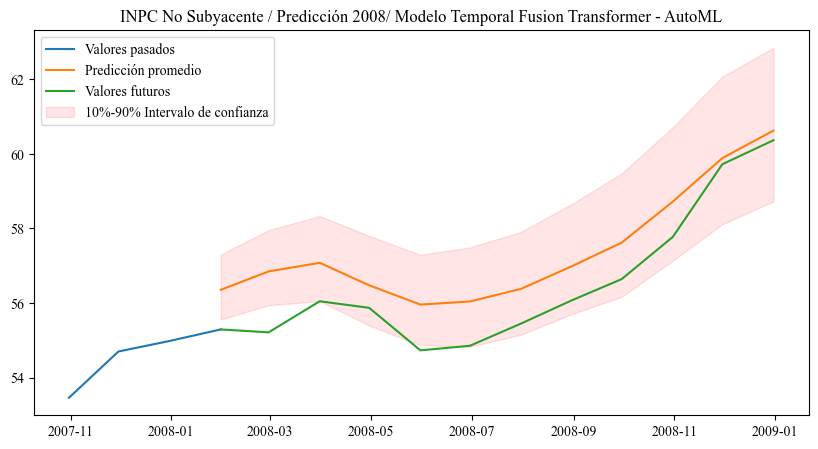

In [21]:
plt.figure(figsize=(10, 5))

item_id = "ipcnsub"
y_past = train_data.loc[item_id]["ipcnsub"][225:+229]
y_pred = predictions.loc[item_id]
y_test = test_data_n1.loc[item_id]["ipcnsub"][-12:]

plt.plot(y_past[-200:+252], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC No Subyacente / Predicción 2008/ Modelo Temporal Fusion Transformer - AutoML')
plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend(loc=2);